# Here is my hw solution

In [1]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
import time

2022-10-24 21:31:56.046383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 21:31:56.195539: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-24 21:31:57.072172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lus/theta-fs0/software/thetagpu/openmpi-4.0.5/ucx-1.9.0rc7/lib:/lus/theta-fs0/software/thetagpu/openmpi-4.0.5/lib
2022-10-24 21:31:57.072244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could

CIFAR-10 data set

Again we'll load the cifar10 data set. CIFAR-10 dataset contains 32x32 color images from 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.


In [22]:
!pip install image-dataset-loader
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
!tar -xf cifar10.tgz

Defaulting to user installation because normal site-packages is not writeable
--2022-10-24 20:55:20--  https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.165.152
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.165.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135107811 (129M) [application/x-tar]
Saving to: ‘cifar10.tgz.3’

cifar10.tgz.3       100%[===================>] 128.85M  75.8MB/s    in 1.7s    

2022-10-24 20:55:22 (75.8 MB/s) - ‘cifar10.tgz.3’ saved [135107811/135107811]



In [2]:
from image_dataset_loader import load
(x_train, y_train), (x_test, y_test) = load('cifar10', ['train', 'test'])

x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('CIFAR-10 data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)


CIFAR-10 data loaded: train: 50000 test: 10000
X_train: (50000, 32, 32, 3)
y_train: (50000,)


In [26]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], strides =(1, 1), padding="same", activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], strides =(1, 1), padding="same", activation='relu')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv_4 = tf.keras.layers.Conv2D(128, [3, 3], strides =(1, 1), padding="same", activation='relu')
        self.pool_5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_6 = tf.keras.layers.Dropout(0.25)
        self.dense_7 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_8 = tf.keras.layers.Dropout(0.5)
        self.dense_9 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_10 = tf.keras.layers.Dropout(0.5)
        self.dense_11 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.conv_4(x)
        x = self.pool_5(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.drop_6(x)
        x = self.dense_7(x)
        x = self.drop_8(x)
        x = self.dense_9(x)
        x = self.drop_10(x)
        x = self.dense_11(x)

        return x

In [27]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [28]:
batch_size = 50
epochs = 20
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/20
1000/1000 [==============================] - 3s 2ms/step - loss: 1.7443 - accuracy: 0.3514
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 1.3063 - accuracy: 0.5375
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1420 - accuracy: 0.5982
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0487 - accuracy: 0.6354
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9860 - accuracy: 0.6592
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9174 - accuracy: 0.6846
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8766 - accuracy: 0.6981
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.8369 - accuracy: 0.7142
Epoch 9/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8059 - accuracy: 0.7242
Epoch 10/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.776

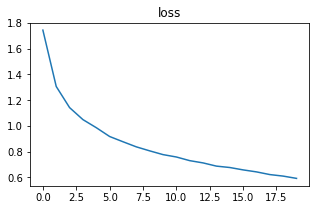

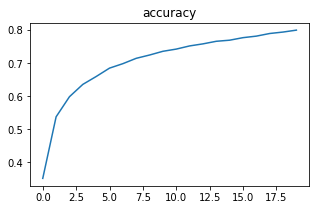

In [29]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [30]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 0.7335 - accuracy: 0.7560 - 520ms/epoch - 2ms/step
accuracy: 75.60%
CPU times: user 783 ms, sys: 122 ms, total: 905 ms
Wall time: 651 ms
